connect to drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import libraries
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

download input image and show it

In [ ]:
input_img = cv2.imread("/content/drive/MyDrive/Image Analysis/Ex_0X/immed_gray_inv.pgm", cv2.IMREAD_GRAYSCALE)

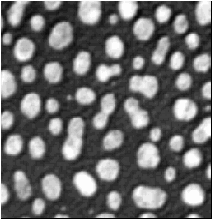

In [ ]:
cv2_imshow(input_img)

In [ ]:
print(input_img.shape)

(219, 212)


In [ ]:
nrows = input_img.shape[0]
ncols = input_img.shape[1]

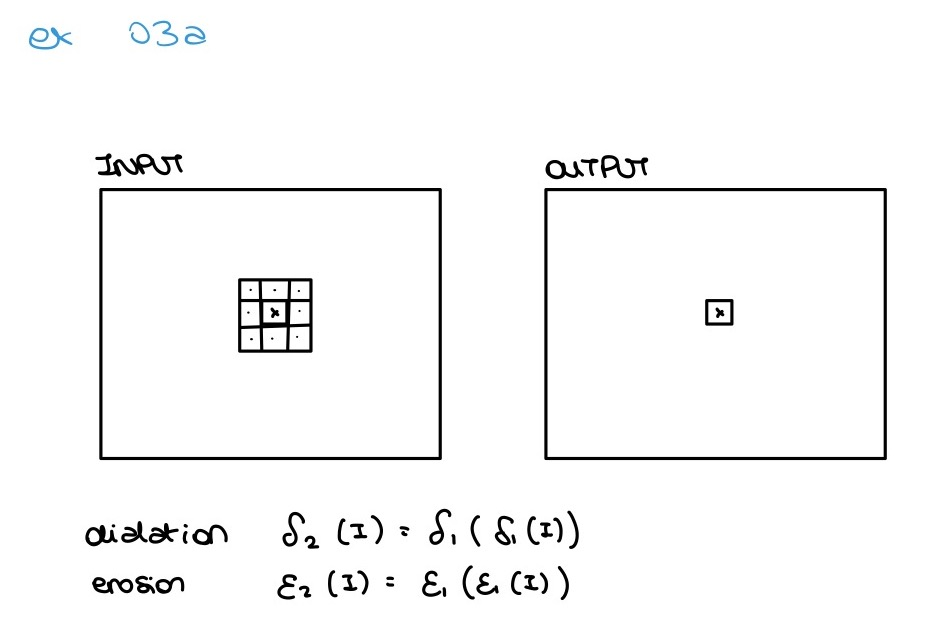

Exercise 03a. Implement a program 'exercise_03b_dilation' that performs a morphological dilation of size 'i' using a square of size (2*i +1)x(2*i +1):\
exercise_03b_dilation i exercise_03b_input_01.pgm exercise_03b_output_01.pgm\
Note: 8-connectivity is assumed.\
Use the property of computing an dilation of size i in terms of elementary dilation of size 1.

perform erosion of size 1 and then 2\
size i:
(2*i+1)X(2*i+1)

In [ ]:
def calculateRange(i, index, tot):
  if (index < i) :
    #not enouth in the upper part
    step = i - index
    return range(-i+step, i+1)

  elif((tot-1)-index < i):
    #not enouth in the lower part
    step = i - (tot - (index + 1))
    return range(-i, i+1-step)

  else:
    #hole filter
    return range(-i, i+1)

In [ ]:
#maximum of neighborhood

def dilation(image, i):

  nrowfil = 2*i +1

  shape = image.shape
  nrows = image.shape[0]
  ncols = image.shape[1]

  output_img = image.copy()

  for r in range(nrows):
    for c in range(ncols):

      maximum = image[r][c]

      row_fil = calculateRange(i, r, nrows)
      col_fil = calculateRange(i, c, ncols)

      for row in row_fil:
        for col in col_fil:
          pixel = image[r+row][c+col]

          if(pixel > maximum):
            #update the maximum
            maximum = pixel
      output_img[r][c] = maximum

  return output_img

In [ ]:
out1 = dilation(input_img, 1)

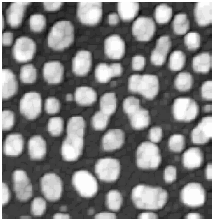

In [ ]:
cv2_imshow(out1)

In [ ]:
out2 = dilation(input_img, 2)

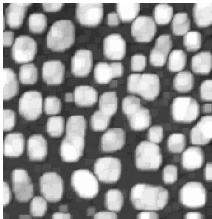

In [ ]:
cv2_imshow(out2)

Test the result 

In [ ]:
true_output1 = cv2.imread("/content/drive/MyDrive/Image Analysis/Ex_0X/immed_gray_inv_20051123_dil1.pgm", cv2.IMREAD_GRAYSCALE)

In [ ]:
true_output2 = cv2.imread("/content/drive/MyDrive/Image Analysis/Ex_0X/immed_gray_inv_20051123_dil2.pgm", cv2.IMREAD_GRAYSCALE)

In [ ]:
def compare(I1, I2):

  output = 0

  shape1 = I1.shape
  shape2 = I2.shape

  #first check if have the same shape
  if shape1 != shape2:
    return output

  nrows = I1.shape[0]
  ncols = I2.shape[1]

  for i in range(nrows):
    for j in range(ncols):
      if I1[i][j] != I2[i][j]:
        return output

  #the two images matches
  output = 1
  return output

In [ ]:
compare(true_output1, out1)

1

In [ ]:
compare(true_output2, out2)

1